# Patent Success Prediction

## This notebook takes in data from pending applications and predicts possibility of acceptance based on supporting information and similarity to previously acccpted patents.


### The following 5 cells flatten the data from pending applications into a usable form

In [4]:
import pandas as pd
from IPython.display import IFrame
import urllib.request
import json
headers=['applicantid','patentId','patentNumber','supportingMaterial','hasRepresentative','natureOfPatent','hasPublications', 'creator', 'busisnessSize', 'businessName', 'isValid', 'track1NonProvisionalApp','provisional','description','usNationalStageNumber','acceleratedExam','nonProvisionalExam','reexam','reissue','isDesignApplication', 'country','info','isForeignPriority','isInternationalDesignApp','receivingOffice']


In [5]:
applicant = open('applicant')
appId=[]
creator=[]
busSize=[]
busName=[]
for line in applicant:
    line=line.split(',')
    if len(line)<6:
        continue
    x=5
    bussize=line[x]
    while bussize not in ['Small', 'Medium', 'Large', 'Independent'] and x<len(line)-2:
        x+=1
    else:
        busSize.append(line[x])
        busName.append(line[x+1].strip('\n'))
    appId.append(line[0])
    creator.append(line[2])
df=pd.DataFrame({'applicantId':appId, 'creator':creator, 'businessSize':busSize, 'businessName':busName })
df=df[1:]


In [6]:
applicant= open('application')
for line in applicant:
        line=line.split(',')
        apid=line[5]
        valid=line[7]
        patid=line[6]
        for row in range(1,len(df)):
            if apid==df.at[row,'applicantId']:
                df.loc[row,'isValid']=valid.strip('\n')
                df.loc[row, 'patentId']=patid
                break


        

In [7]:
applicant = open('patent')
for line in applicant:
    try:
        line=line.split(',')
        patid=line[0]
        patnum=line[1]
        product=line[2]
        rep=line[4]
        x=5
        while line[x] not in ['Chemical', 'Material', 'Structural'] and x<len(line)-2:
            x+=1
        nature=line[x]
        pub=line[x+1]
    except IndexError:
        continue
    for row in range(1, len(df)):
        if patid == df.loc[row, 'patentId']:
            df.loc[row, 'patentNumber'] = patnum
            df.loc[row, 'productName'] = product
            df.loc[row, 'hasRepresentative'] = rep
            df.loc[row, 'patentNature'] = nature
            df.loc[row, 'hasPublication'] = pub
df=df[df['creator']!= 'NULL']
df=df[df['businessSize']!='']


In [10]:
df=df.reset_index()
df.drop('index', axis=1, inplace=True)
applicant=open('DomesticForeignInfluence')
for line in applicant:
    line=line.split(',')
    patnum=line[4]
    country=line[1]
    info=line[2]
    isforeigninf=line[3]
    for row in range(1, len(df)):
        if str(patnum).strip() == str(df.loc[row, 'patentNumber']).strip():
            df.loc[row, 'country'] = country
            df.loc[row, 'info'] = info
            df.loc[row, 'isForeignInfluence'] = isforeigninf


df


,applicantId,creator,businessSize,businessName,isValid,patentId,patentNumber,productName,hasRepresentative,patentNature,hasPublication,country,info,isForeignInfluence
0,00d0ce0b-dfeb-4531-87f6-a34210f0d110,"""Burt Curtis""",Small,"""Burt's Bees""",Valid,55a77995-81d7-4f03-823c-541a858fe16b,e2f407b5-b231-44e7-b292-b6b7157de679,"""Beeswax Lip Balm""",1,Structural,1,NaN,NaN,NaN
1,019b3271-1ab4-4b1d-9372-5ad4f3ef4daa,"""Nikolai Vermont""",Large,"""Karvey's Paint Stores""",Valid,36924e77-8ef9-4d1b-a6ab-ffa60d0070b3,d1478b42-bf0d-4d67-90b2-59ab18cbb7b5,"""Paint Markers""",1,Structural,1,Australia,,1
2,07c4a975-ac78-4632-9c57-1572c323c124,Katya,Large,"""Boats inc""",Valid,df577588-cff2-48ff-845e-99374f80c53b,d9bfa9f3-a9b3-4bdd-bfbc-ae307832dc2d,Boat,1,Material,0,reason-6,,1
3,08204ca7-cc10-46bc-ba2a-59dc2b807a7d,"""Samantha Richardson""",Large,HydroFlask,Valid,07e5b6a6-1433-4fd1-b47e-4a3b7fa856af,71169873-954c-4000-8c75-c63b5eb55b58,"""Insulated Waterbottle""",1,Structural,0,"""United States""","""This patent has domestic priority.""",0
4,0cb23c67-7f0a-4289-96d3-47ded5bbbe40,"""Ali Hussaid""",Medium,HeadForEars,Valid,e56172a8-5634-444a-bfdb-4b4ca6b71e84,f0031e65-1b6a-4ad7-a700-4de6b566e5b3,"""Transforming Earphones""",0,Material,0,Zimbabwe,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,f63cd5dc-f124-4816-ae16-5e10343f2a69,"""Michael Pam""",Large,"""Scranton Paper & Ink Co.""",Valid,49bca521-149c-408d-8e01-d678f00c0821,0d4e8933-d1c4-484c-a127-c9acd1ff38ca,"""Disappearing Ink""",1,Material,1,"""United States""","""This application has domestic priority in the...",0
80,f81ef25d-d96d-4db7-a1c0-76005a7dfa6c,"""Samuel Han""",Medium,"""Car Innov@torZZZ""",Valid,409491f7-3f96-4453-9a0b-5c7cd7f6a937,07c58b16-4d5a-4825-8441-4e7f6801ab34,"""Flying Car""",0,Material,1,NaN,NaN,NaN
81,f897689a-7bfe-4e83-ba98-d5696600f926,"""Chris Mamba""",Small,"""Cool Designs Inc.""",Valid,bf4653f3-b4e7-42f1-956a-869c9525f05a,111f921d-2c1e-47fd-a3af-fa2ee9c3d34e,"""Phone Case Design""",1,Structural,0,NaN,NaN,NaN
82,f9295264-bc68-4584-b529-8e9180d6bfee,"""John Tablesom II""",Small,"""Tables Inc.""",Invalid,78d7edb2-c16c-4d90-8e53-dcacf80d6fb6,f11cb3da-8709-473c-82c9-ba5a8df4abbe,"""Extending Table Legs""",0,Structural,0,Canada,,1


### The following three cells count up the amount of supporting information provided with the patent such as publications, exams, and representatives.

In [11]:

for row in range(0, len(df)):
    exams=0
    applicant= open('supplementalExam')
    for line in applicant:
        line=line.split(',')
        if line[1] == df.loc[row, 'patentNumber']:
            df.loc[row, 'hasExam'] = 1
            exams+=1
    if exams==0:
        df.loc[row, 'hasExam'] = 0
    else:
        df.loc[row, 'numExams'] = exams
    applicant.close()
    


In [12]:

for row in range(0, len(df)):
    reps=0
    applicant= open('representative')
    for line in applicant:
        line=line.split(',')
        if len(line)<8:
            continue
        if str(line[7]).strip() == str(df.loc[row, 'patentNumber']).strip():
            reps+=1
    applicant.close()
    
    df.loc[row, 'numReps'] = reps

In [13]:

for row in range(0, len(df)):
    pubs=0
    applicant= open('Publication')
    for line in applicant:
        line=line.split(',')
        if len(line)<8:
            continue
        if str(line[7]).strip() == str(df.loc[row, 'patentNumber']).strip():
            pubs+=1
    applicant.close()
    df.loc[row, 'numPubs'] = pubs
df.fillna(0, inplace=True)


## We now send data about the application to an API that supplies information about accepted patents. We are counting up how many similar patents have been accepted.

In [ ]:

for row in range(0,len(df)):
    datalist=[]
    s = df.loc[row, 'productName']
    numSimPats=0
    for x in range(1,20):
        df.loc[row, "similarPatents"]=numSimPats
        print('.', end='')
        url = """https://www.patentsview.org/api/patents/query?q="""
        try:
            ss= s.split()
        except AttributeError:
            continue
        if len(ss) == 1:
            query="""{"_text_all":{"patent_title":"%s"}}&o={"page":%d,"per_page":50}"""%(s,x)
        else:
            query="""{"_text_all":{"patent_title":%s}}&o={"page":%d,"per_page":50}"""%(str(s).replace(' ', '%20'),x)
        try:
            uh = urllib.request.urlopen(url+query)
        except:
            print('!', end='')
            continue
        data = uh.read().decode()
        if json.loads(data)['total_patent_count']==0:
            continue
        datalist.append(data)
        numSimPats+=json.loads(data)['count']
    

.................................................................................................................................................................................................!..........................................................................................!..............................................................................................................................................................................................................................................................................................................................................................!................................................................................!...........................................................................................................................................................................................................................................................................................

## The cell below runs an algorithm that rates the usefulness of supporting information A.K.A. the 'complexity' of the application, compares that to the number of similar patents that have been accepted, and assigns an approval rating.

In [ ]:
df['Complexity']=df['numExams']+df['numPubs']+df['numReps']
for row in range(len(df)):
    if df.loc[row,'businessSize'] =='Large':
        x=2
    if df.loc[row,'businessSize'] =='Small':
        x=1.5
    if df.loc[row,'businessSize'] =='Medium':
        x=1.2
    if df.loc[row,'businessSize'] =='Independent':
        x=1
    df.loc[row,'Complexity']/=x
    if df.loc[row,'Complexity']==0 and df.loc[row, 'similarPatents']==0:
        continue
    if df.loc[row,'Complexity']==0:
        df.loc[row,'Complexity']=.1
    if df.loc[row, 'similarPatents']==0:
        df.loc[row, 'similarPatents']=.1

df['Approval'] = (df['similarPatents']/50)*(df['Complexity']*50)
df['Approval']*=(11/100)
df['Approval'].describe()

In [ ]:
size=df[['businessSize','Approval','businessName']]
likely=df[['Approval','similarPatents','Complexity','businessName']]
size.to_csv('finalsize.csv')
likely.to_csv('finallikely.csv')
df.to_csv('finalfull.csv')

# Approval Likelihood by Similar Patents and Supporting Info
 This visualization represents the approval likelihood with the x-axis being the amount of supporting information and the y-axis being the number of similar patents that have been approved. Lighter green patents are very likely to be approved, while darker purple are much more unlikely. Hover over the dots to see the name of the product and the exact percentage of approval likelihood.

In [ ]:
display(IFrame('https://public.flourish.studio/visualisation/1233063/',width=900, height=800, frameborder=0, scrolling="no"))

# Approval Likelihood by Business Size
The following graph takes the likelihood of approval and organizes it by company size. From our test data, you can see patents from independents have a greater ratio of rejected patents to accepted patents, whereas medium sized companies have a more even spread. 

In [18]:
display(IFrame('https://public.flourish.studio/visualisation/1233200/',width=900, height=800, frameborder=0, scrolling="no"))

Flattening and reorganizing data for more graphs

In [6]:
network=df[['businessSize', 'productName']]
points=df[['productName','patentNature']]
points

,productName,patentNature
0,"""Beeswax Lip Balm""",Structural
1,"""Paint Markers""",Structural
2,Boat,Material
3,"""Insulated Waterbottle""",Structural
4,"""Transforming Earphones""",Material
...,...,...
78,"""Disappearing Ink""",Material
79,"""Flying Car""",Material
80,"""Phone Case Design""",Structural
81,"""Extending Table Legs""",Structural


In [11]:
points.insert(2,'size',1)

In [12]:
df.businessSize.value_counts()
points

,productName,patentNature,size
0,"""Beeswax Lip Balm""",Structural,1
1,"""Paint Markers""",Structural,1
2,Boat,Material,1
3,"""Insulated Waterbottle""",Structural,1
4,"""Transforming Earphones""",Material,1
...,...,...,...
78,"""Disappearing Ink""",Material,1
79,"""Flying Car""",Material,1
80,"""Phone Case Design""",Structural,1
81,"""Extending Table Legs""",Structural,1


In [13]:
points=points.append({'productName':'Small','patentNature':'Size','size':len(df[df['businessSize']=='Small'])}, ignore_index=True)
points=points.append({'productName':'Medium','patentNature':'Size','size':len(df[df['businessSize']=='Medium'])}, ignore_index=True)
points=points.append({'productName':'Large','patentNature':'Size','size':len(df[df['businessSize']=='Large'])}, ignore_index=True)
points=points.append({'productName':'Independent','patentNature':'Size','size':len(df[df['businessSize']=='Independent'])}, ignore_index=True)

In [14]:
points.tail(15)

,productName,patentNature,size
72,Flashlight,Material,1
73,"""Flaming Cars""",Material,1
74,"""Corn Plant""",Chemical,1
75,"""Indigo Food Coloing""",Chemical,1
76,"""Bluetooth Mouse""",Structural,1
77,"""Corn Harvester""",Structural,1
78,"""Disappearing Ink""",Material,1
79,"""Flying Car""",Material,1
80,"""Phone Case Design""",Structural,1
81,"""Extending Table Legs""",Structural,1


In [15]:
points.to_csv('points.csv')
network.to_csv('links.csv')

In [36]:
df=df[df['patentNature']!='0']
B=df[df['businessSize']=='Small'].patentNature.value_counts()
C=df[df['businessSize']=='Medium'].patentNature.value_counts()
D=df[df['businessSize']=='Large'].patentNature.value_counts()
E=df[df['businessSize']=='Independent'].patentNature.value_counts()
A=['Structural','Material','Chemical']

fd=pd.DataFrame({'Small':B,'Medium':C,'Large':D,'Independent':E})

In [37]:
fd

,Small,Medium,Large,Independent
Chemical,5,6,5,2
Material,6,9,15,6
Structural,6,3,18,1


In [38]:
fd.to_csv('pie.csv')

# Patent Nature by Company Size

In [39]:

display(IFrame('https://public.flourish.studio/visualisation/1237847/',width=900, height=800, frameborder=0, scrolling="no"))

# Overview
<blockquote>The following notebook showcases visualizations regarding patent data to examine correlations and patterns in this data. In order to use the notebook, you must have the following installed: 
<ul>
    <li>jupyter notebook</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
</ul>
By running this notebook in jupyter, we can see the visualizations when comparing patent data</blockquote>

## Required Files
<blockquote>You will need the patents2.csv file in order to run the notebook.</blockquote>

In [96]:
patents_data = pd.read_csv("patents2.csv")

## Barplots Regarding Business Size
<blockquote>Below we have three different barplots that show the following:
<ul>
    <li>Average Number of Representatives by Business Size</li>
    <li>Average Number of Publications by Business Size</li>
    <li>Average Number of Supplemental Exams by Business Size</li>
</ul>
We use the following to see if business size has a correlation to the average number for representatives, publications, and supplemental exams.
</blockquote>

Text(0, 0.5, 'Average Number of Representatives')

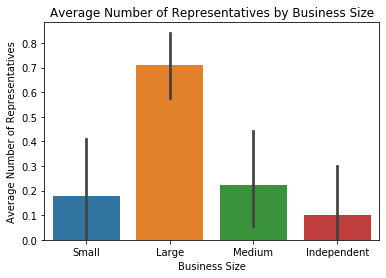

In [97]:
# Barplots with Regards to Business Size
plt.title("Average Number of Representatives by Business Size")
sns.barplot(x=patents_data['businessSize'], y=patents_data['numReps'])
plt.xlabel("Business Size")
plt.ylabel("Average Number of Representatives")

Text(0, 0.5, 'Average Number of Publications')

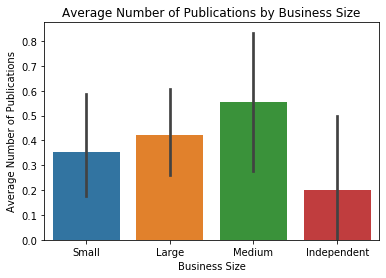

In [98]:
plt.title("Average Number of Publications by Business Size")
sns.barplot(x=patents_data['businessSize'], y=patents_data['numPubs'])
plt.xlabel("Business Size")
plt.ylabel("Average Number of Publications")

Text(0, 0.5, 'Average Number of Exams')

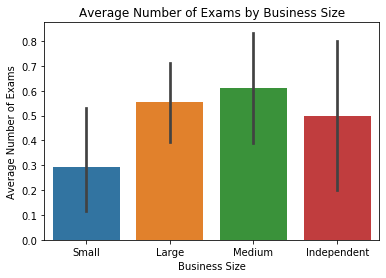

In [99]:
plt.title("Average Number of Exams by Business Size")
sns.barplot(x=patents_data['businessSize'], y=patents_data['numExams'])
plt.xlabel("Business Size")
plt.ylabel("Average Number of Exams")

## Barplots Regarding Patent Nature and Validity
<blockquote>Below we have three different barplots that show the following:
<ul>
    <li>Average Number of Representatives by Patent Nature and Validity</li>
    <li>Average Number of Publications by Patent Nature and Validity </li>
    <li>Average Number of Supplemental Exams by Patent Nature and Validity</li>
</ul>
We use the following to see if patent nature and validity has a correlation to the average number for representatives, publications, and supplemental exams.
</blockquote>

Text(0, 0.5, 'Average Number of Representatives')

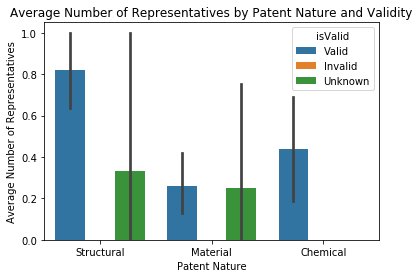

In [100]:
#Barplots with Regard to Patent Nature and Validity
plt.title("Average Number of Representatives by Patent Nature and Validity")
sns.barplot(x=patents_data['patentNature'], y=patents_data['numReps'], hue=patents_data['isValid'])
plt.xlabel("Patent Nature")
plt.ylabel("Average Number of Representatives")

Text(0, 0.5, 'Average Number of Publications')

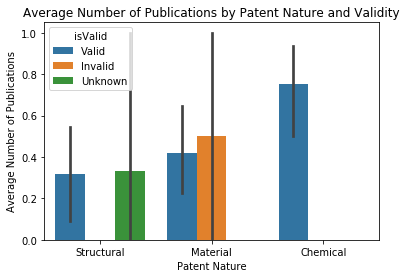

In [101]:
plt.title("Average Number of Publications by Patent Nature and Validity")
sns.barplot(x=patents_data['patentNature'], y=patents_data['numPubs'], hue=patents_data['isValid'])
plt.xlabel("Patent Nature")
plt.ylabel("Average Number of Publications")

Text(0, 0.5, 'Average Number of Exams')

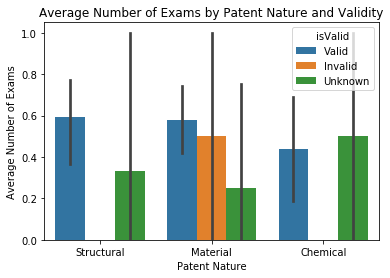

In [102]:
plt.title("Average Number of Exams by Patent Nature and Validity")
sns.barplot(x=patents_data['patentNature'], y=patents_data['numExams'], hue=patents_data["isValid"])
plt.xlabel("Patent Nature")
plt.ylabel("Average Number of Exams")

## Heatmap of correlations between numeric fields
<blockquote>Below we have a heatmap that utilizes numeric fields in patents2.csv and checks to see if there are any correlations between these fields. Between 0 and 1, if there is a high correlation between two fields, the number is higher. If there is a low correlation between two fields, the number is lower.
</blockquote>

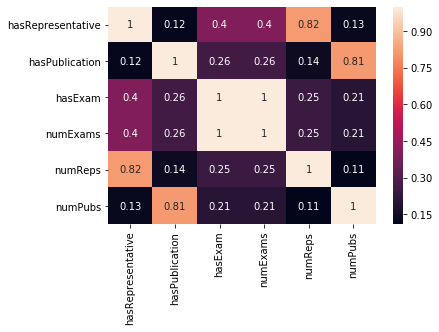

In [103]:
corr=patents_data[['hasRepresentative', 'hasPublication', 'hasExam', 'numExams', 'numReps', 'numPubs']].corr()
sns.heatmap(corr, annot=True)

## Two-Dimensional KDE (Kernal Density Estimate) Plot
<blockquote>We use a 2D KDE plot to see possible correlations between numeric fields. Specifically, we look between:<ul>
    <li>Number of Representatives and Number of Publications</li>
    <li>Number of Representatives and Number of Exams</li>
    <li>Number of Publications and Number of Exams</li>
</ul></blockquote>

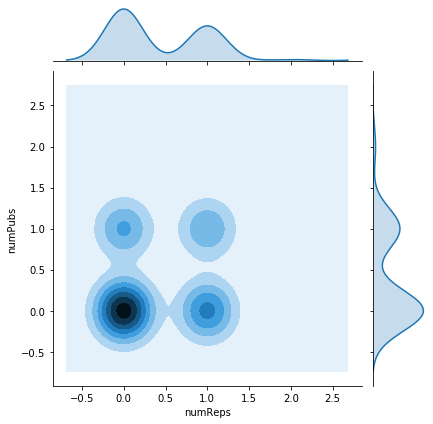

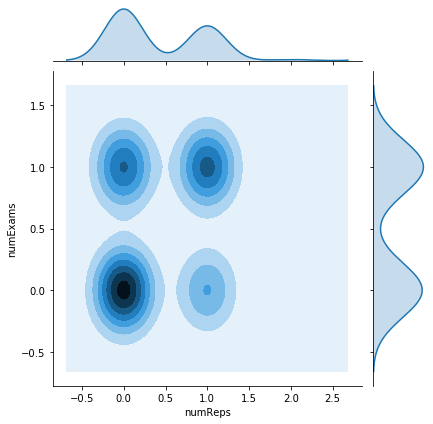

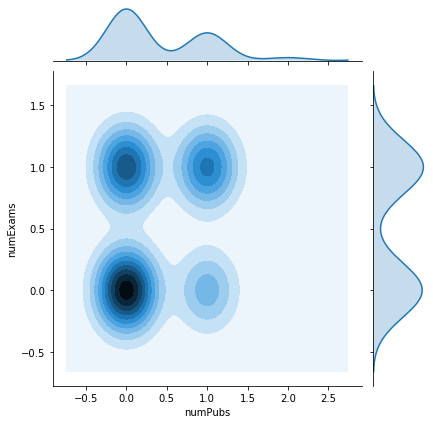

In [104]:
sns.jointplot(x=patents_data['numReps'], y=patents_data['numPubs'], kind="kde")
sns.jointplot(x=patents_data['numReps'], y=patents_data['numExams'], kind="kde")
sns.jointplot(x=patents_data['numPubs'], y=patents_data['numExams'], kind="kde")